# Exploratory Data Analysis

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [102]:
#Show plots in jupyter notebook
%matplotlib inline
#sets plot style
sns.set(color_codes=True)
#maximum number of columns displayed
pd.set_option('display.max_columns',100)
#maximum number of rows displayed 
pd.set_option('display.max_rows',100)

Loading data in Python Dataframe:We need to load our client dataset and price dataset into individual dataframes, to enable us work with the data in python 

In [103]:
Client_Dataframe = pd.read_csv(r'C:\Users\Claire Dennis Oluchi\Downloads\forage BCG\client_data.csv')
Price_Dataframe = pd.read_csv(r'C:\Users\Claire Dennis Oluchi\Downloads\forage BCG\price_data.csv')

In [104]:
#Display first 3 rows of client Dataframe
Client_Dataframe.head(4)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [105]:
#Display first 4 rows of price Dataframe
Price_Dataframe.head(4)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0


For Our client Dataframe there is a mix of numerical and categorical data which needs to be transformed when modelling



Discriptive Statistics of data (Data type and Data shape)

It is important to first understand the data that you’re dealing with along with the data types of each
column. The data types may dictate how you transform and engineer features.


In [106]:
print(Client_Dataframe.shape)
Client_Dataframe.info()

(14606, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
id                                14606 non-null object
channel_sales                     14606 non-null object
cons_12m                          14606 non-null int64
cons_gas_12m                      14606 non-null int64
cons_last_month                   14606 non-null int64
date_activ                        14606 non-null object
date_end                          14606 non-null object
date_modif_prod                   14606 non-null object
date_renewal                      14606 non-null object
forecast_cons_12m                 14606 non-null float64
forecast_cons_year                14606 non-null int64
forecast_discount_energy          14606 non-null float64
forecast_meter_rent_12m           14606 non-null float64
forecast_price_energy_off_peak    14606 non-null float64
forecast_price_energy_peak        14606 non-null float64
forecast_price_pow_off_peak       1460

In [107]:
print(Price_Dataframe.shape)
Price_Dataframe.info()

(193002, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
id                    193002 non-null object
price_date            193002 non-null object
price_off_peak_var    193002 non-null float64
price_peak_var        193002 non-null float64
price_mid_peak_var    193002 non-null float64
price_off_peak_fix    193002 non-null float64
price_peak_fix        193002 non-null float64
price_mid_peak_fix    193002 non-null float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [108]:
#Statistics client dataframe
Client_Dataframe.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [109]:
#Statistics Price datafarme
Price_Dataframe.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Data Visualization

In [110]:
def plot_stacked_bars(dataframe,title_,size=(18,10),rot_=0,legend="upper right"):
    
    """
    plot stacked bars with annotations
    """
    ax=dataframe.plot(kind="bar",stacked=True,figsize=size,rot=rot_,title=title_)
   
    #Annotate stacked bars
    annotate_stacked_bars(ax, textsize=15)
    
    #Rename Legends
    plt.legend(["Retention", "Churn"], loc=legend)
    
    #Labels
    plt.ylabel("Company base (%)")
    plt.show()
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
            ax.annotate (value,
((p.get_x()+ p.get_width()/2)*pad-0.05,(p.get_y()+p.get_height()/2)*pad),
color=colour,
size=textsize,)


In [111]:
#Churn
#Rename columns for visualization purposes
churn = Client_Dataframe[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100


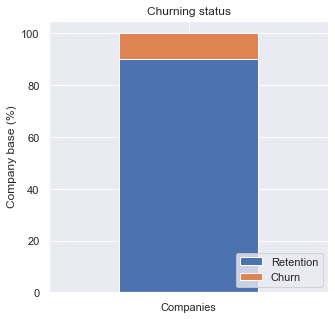

In [112]:
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5,5),legend="lower right")

About 10% of the total customers have churned


## Sales_Channel

In [113]:
channel = Client_Dataframe[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

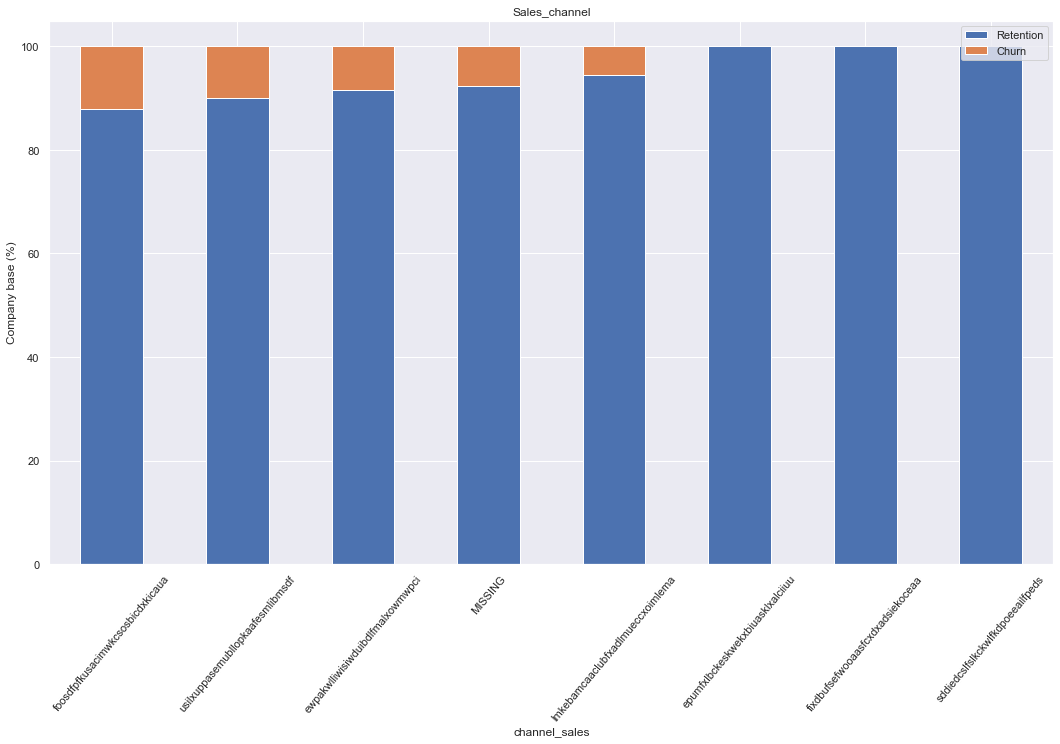

In [114]:
plot_stacked_bars(channel_churn, 'Sales_channel', rot_=50)

The churning customers are distributed over 5 different values for channel_sales, MISSING indicates a missing value and
was added by the team when they were cleaning the dataset. This feature could be an important
feature when it comes to building our model.

# Consumption

In [115]:
consumption = Client_Dataframe[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month','imp_cons', 'has_gas', 'churn']]

In [116]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],"Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax,stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

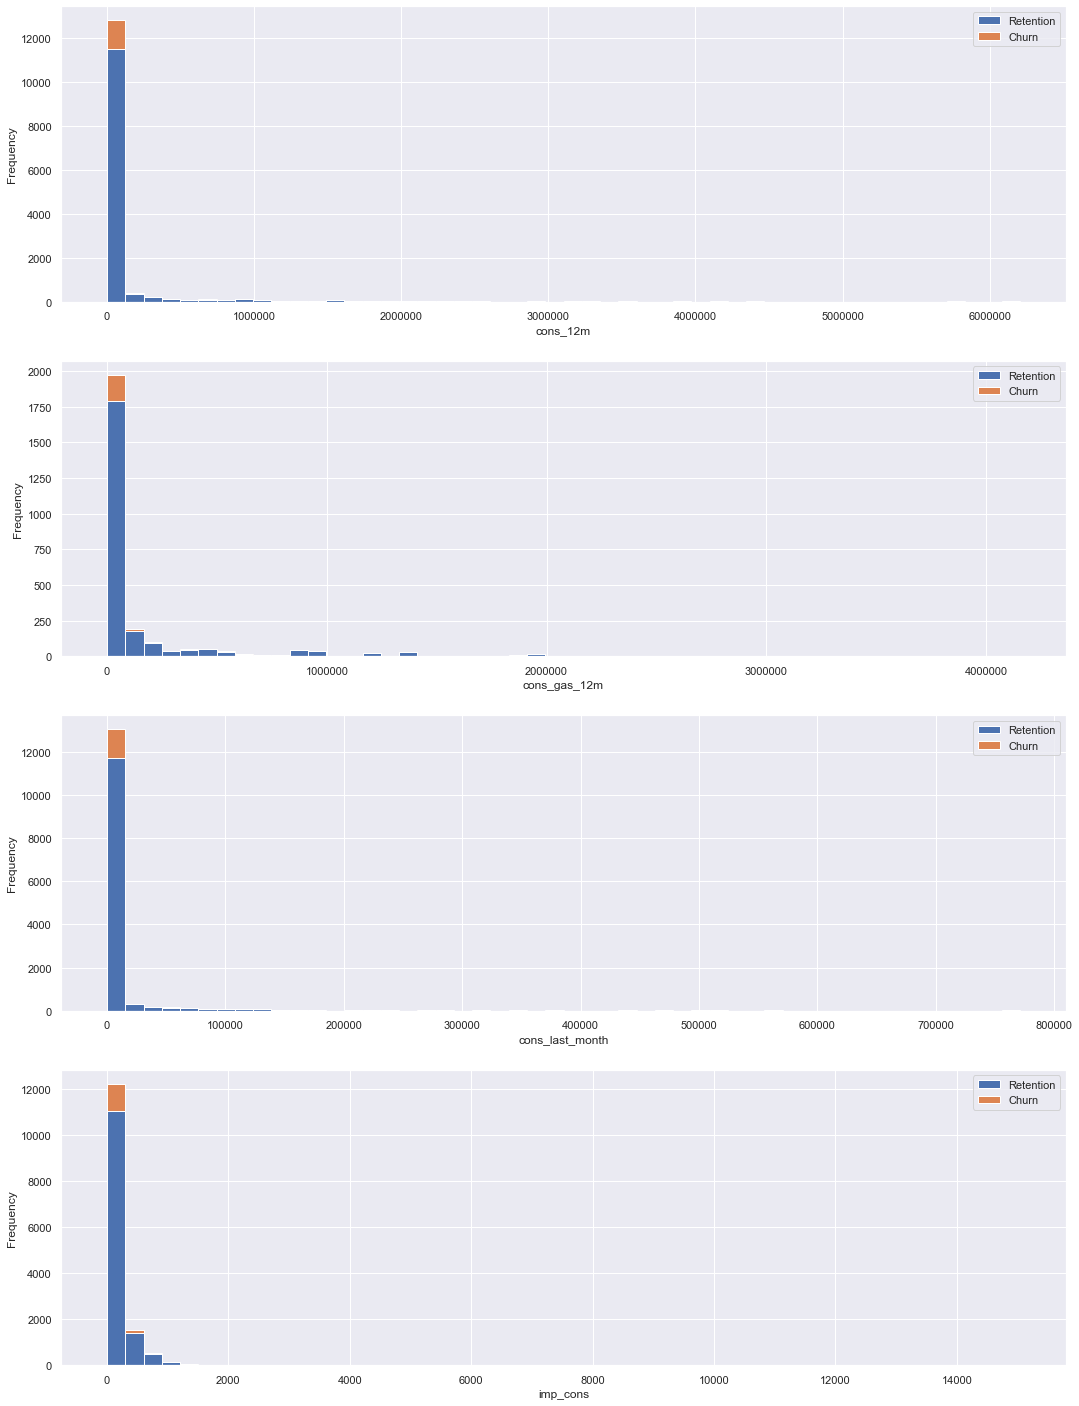

In [117]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))
plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m',axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

From the histogram above, it can be noticed that the data is positively skewed to the right(highly).We can use a standard plot to visualise the outliers in more detail. A boxplotis a standardized way of displaying the distribution based on a fve number summary: - Minimum10- First quartile (Q1) - Median - Third quartile (Q3) - Maximum
It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how
tightly our data is grouped and if/how our data is skewed.

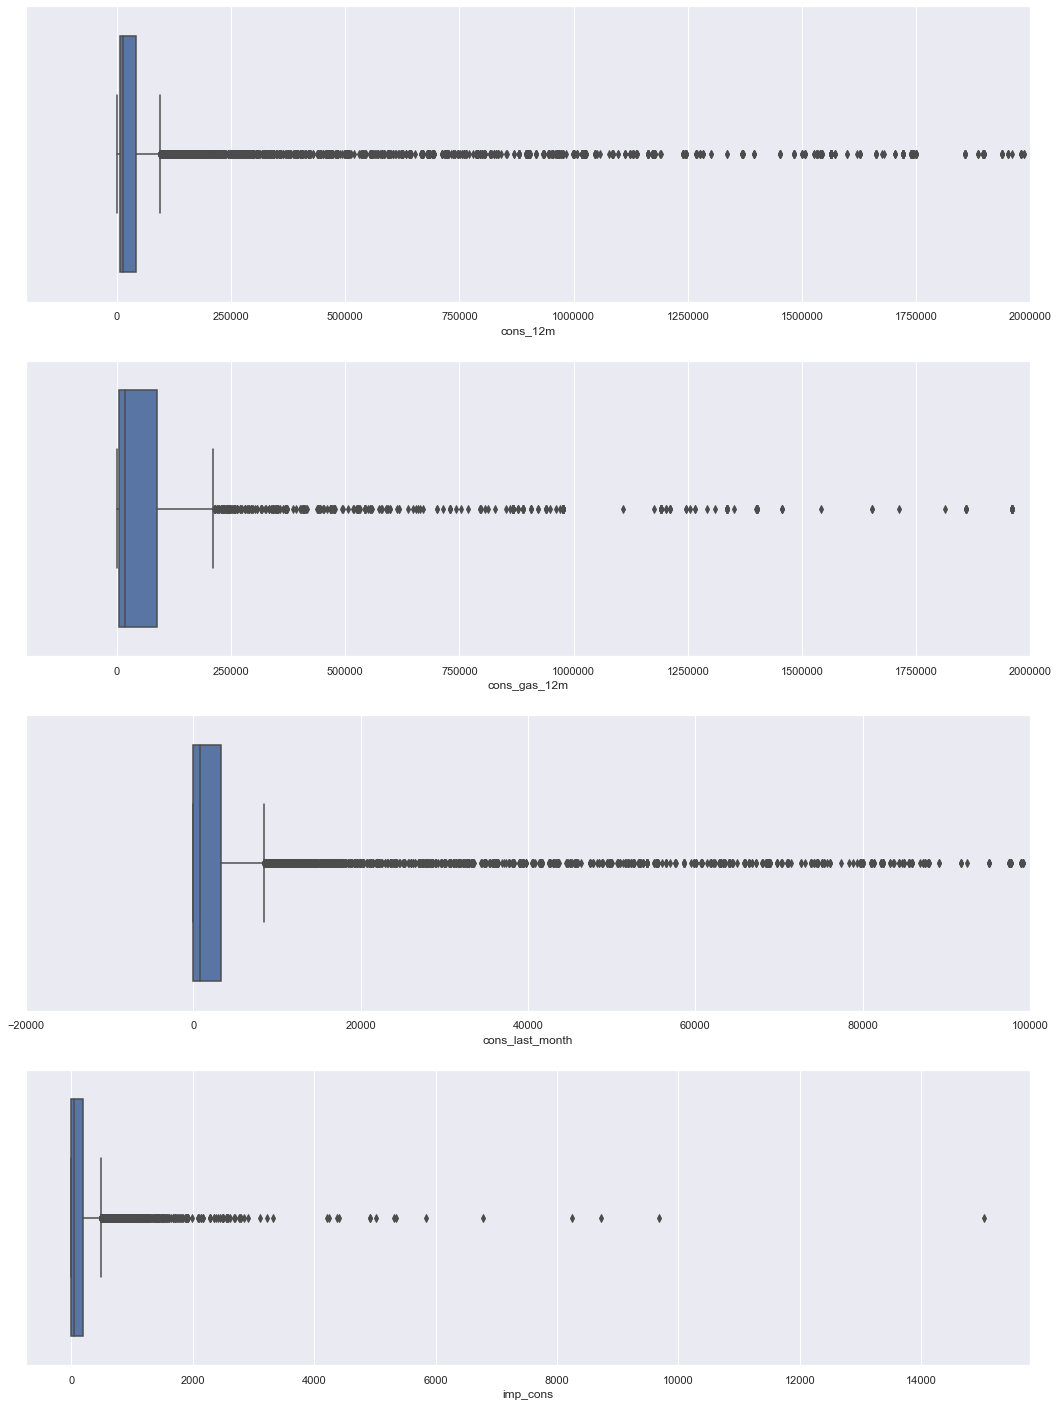

In [118]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"],ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])
# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

# Contract Type

In [119]:
contract_type = Client_Dataframe[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'],contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

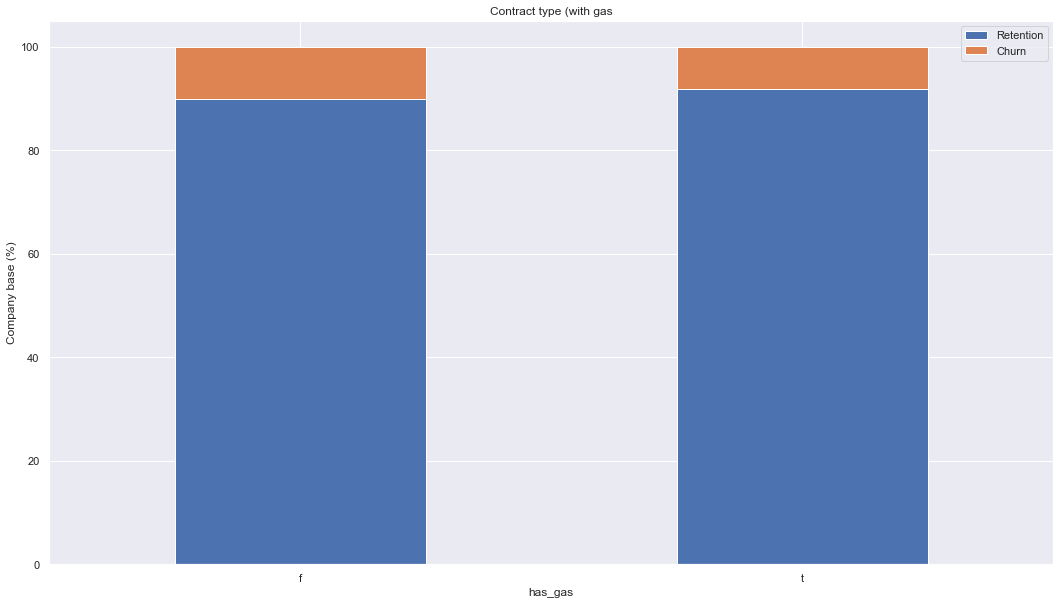

In [120]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

# Margins

In [121]:
margin = Client_Dataframe[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin']]

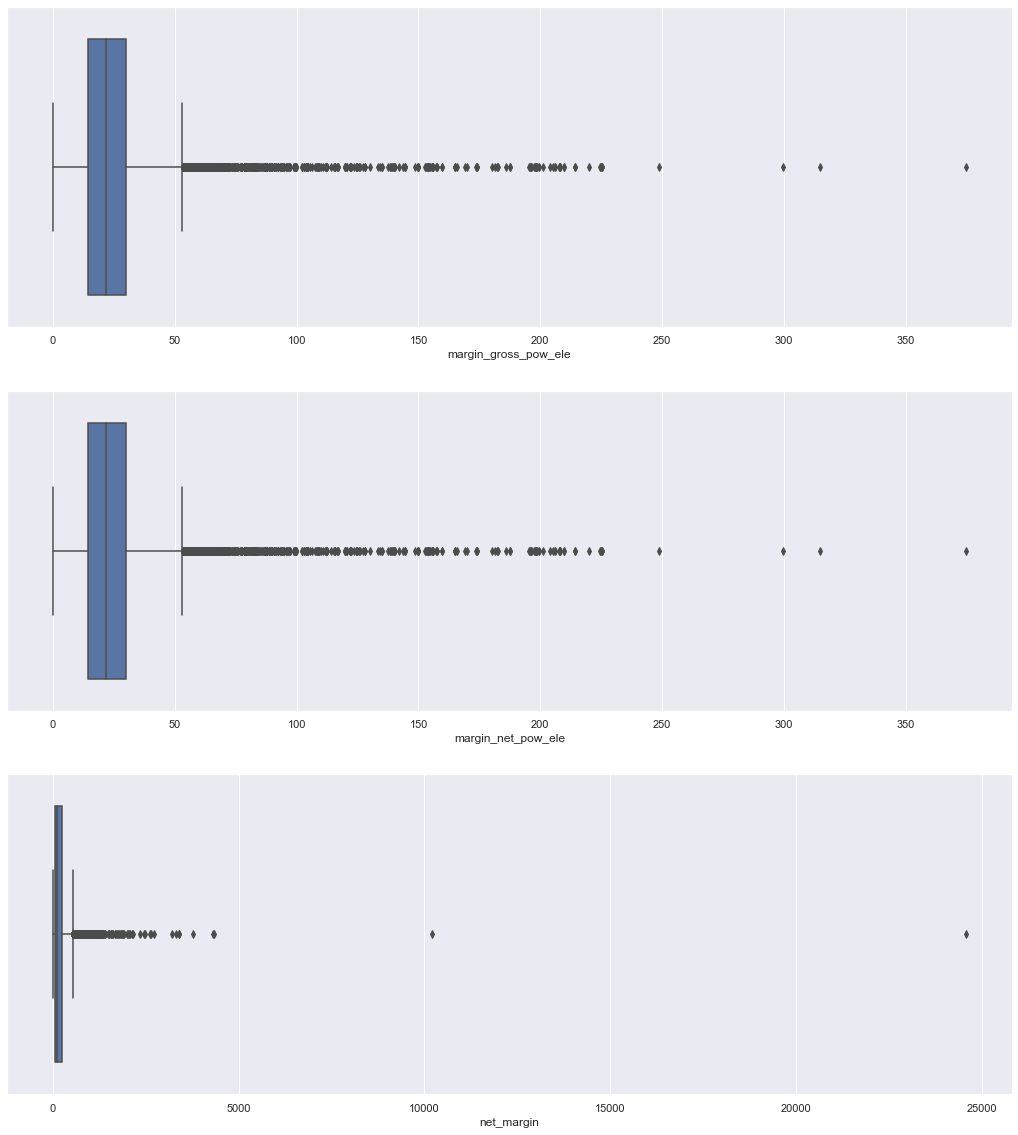

In [122]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

# Plot histogram

sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

# Remove notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

A lot of outliers can be noticed, which will be worked on.

# Power Subscribers

In [123]:
power = Client_Dataframe[['id', 'pow_max', 'churn']]

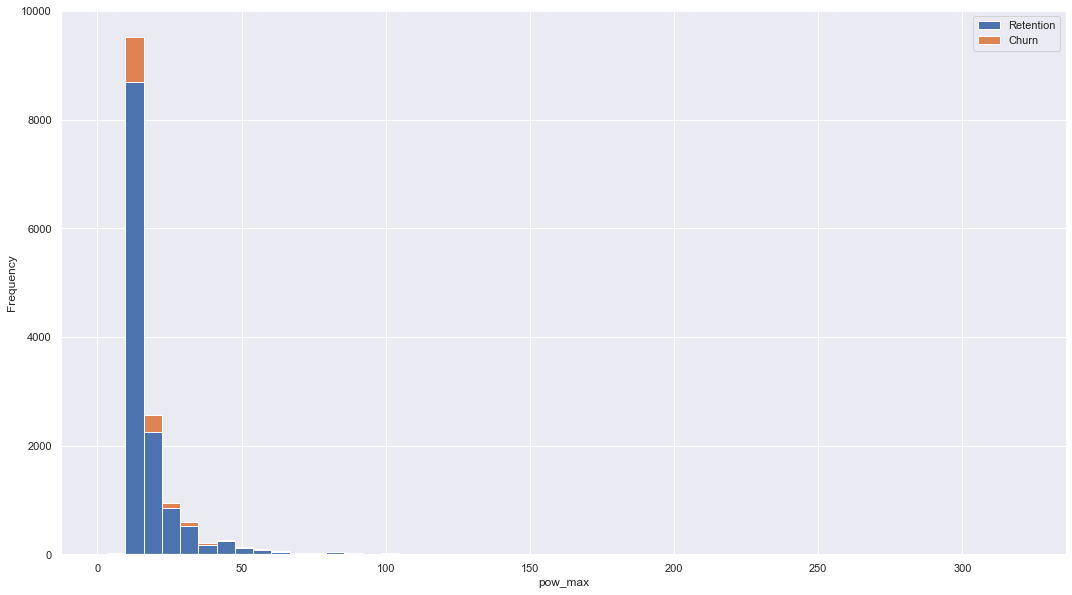

In [124]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

# Hypothesis Investigation

In [125]:
# Transform date columns to datetime type
Client_Dataframe["date_activ"] = pd.to_datetime(Client_Dataframe["date_activ"],format='%Y-%m-%d')
Client_Dataframe["date_end"] = pd.to_datetime(Client_Dataframe["date_end"], format='%Y-%m-%d')
Client_Dataframe["date_modif_prod"] = pd.to_datetime(Client_Dataframe["date_modif_prod"],format='%Y-%m-%d')
Client_Dataframe["date_renewal"] = pd.to_datetime(Client_Dataframe["date_renewal"],format='%Y-%m-%d')
Price_Dataframe['price_date'] = pd.to_datetime(Price_Dataframe['price_date'],format='%Y-%m-%d')

In [126]:
# Create yearly sensitivity features
var_year = Price_Dataframe.groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()

# Create last 6 months sensitivity features
var_6m = Price_Dataframe[
Price_Dataframe['price_date'] > '2015-06-01'
].groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()


# Merge into 1 dataframe
price_features = pd.merge(var_year, var_6m, on='id')

In [127]:
price_features.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0


In [128]:
#Merge the churn data to see whether price sensitivity has any correlation with churn
price_analysis = pd.merge(price_features, Client_Dataframe[['id', 'churn']], on='id')
price_analysis.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0


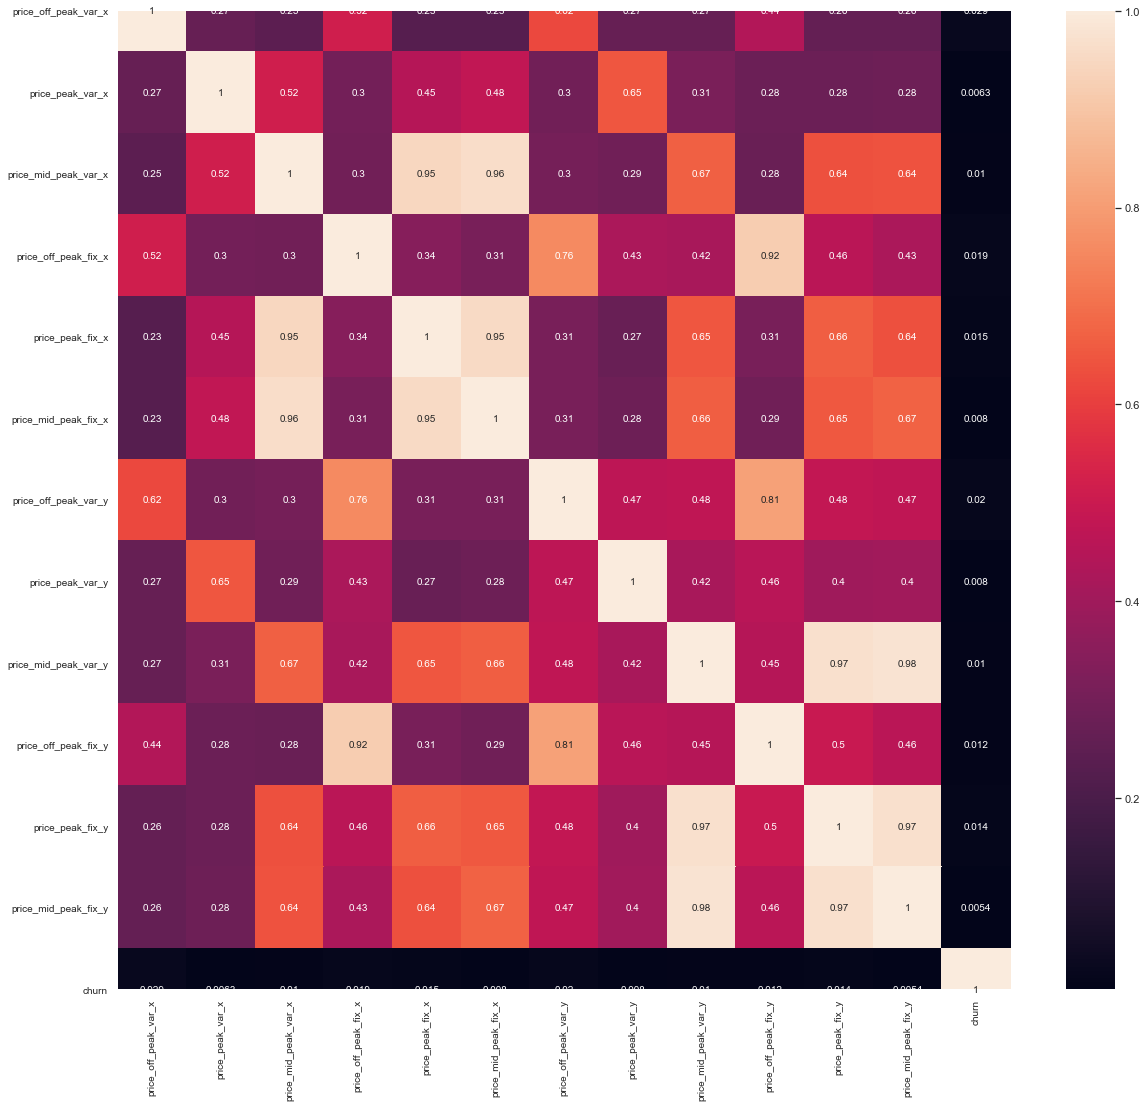

In [129]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation plot above, it shows that the price sensitivity shows a high inter-correlation with
each other, but the correlation with churn is very low. This indicates that there is a weak
linear relationship between price sensitivity and churn. This suggests that for price sensivity to be a
major driver for predicting churn, we may have to engineer the features diﬀerently.

In [130]:
merged_data = pd.merge(Client_Dataframe.drop(columns=['churn']), price_analysis,on='id')

In [131]:
merged_data.head(4)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,0.000061,2.627605e-05,0.00044,1.102785,49.550703,22.022535,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0.000005,6.089453e-04,0.00000,0.006465,0.000000,0.000000,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.000006,2.558511e-07,0.00000,0.007662,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.000005,0.000000e+00,0.00000,0.006465,0.000000,0.000000,0.000003,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0


In [132]:
merged_data.to_csv('clean_data_after_eda.csv')